Reference Source: [data-enrichment-wk16-lect01-linear-regression-with-movies - Code Along](https://github.com/ericakitano/data-enrichment-wk16-lect01-linear-regression-with-movies/tree/week-of-07-18-23)

# 1. Import Library

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

# Set global scikit-learn configuration 
from sklearn import set_config

# Display estimators as a diagram
set_config(display='diagram')

# 2. Load Data

Load the data between 2000-2021 that I pulled from TMDB in Part 4.

In [2]:
df = pd.read_csv('Data/part4_tmdb_results_all.csv.gz', lineterminator='\n')
df.head(2)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63148 entries, 0 to 63147
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  63126 non-null  float64
 1   backdrop_path          40883 non-null  object 
 2   belongs_to_collection  4257 non-null   object 
 3   budget                 63126 non-null  float64
 4   genres                 63126 non-null  object 
 5   homepage               15142 non-null  object 
 6   id                     63126 non-null  float64
 7   original_language      63126 non-null  object 
 8   original_title         63126 non-null  object 
 9   overview               61824 non-null  object 
 10  popularity             63126 non-null  float64
 11  poster_path            58195 non-null  object 
 12  production_companies   63126 non-null  object 
 13  production_countries   63126 non-null  object 
 14  release_date           62044 non-null  object 
 15  re

# 3. Clean Data

In [4]:
# remove ids that are NaN
df=df.loc[df['id'].isna()!=True]
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,2244.0,PG
5,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.8,50.0,R


In [5]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df.head(2)

,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
1,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN
2,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.718,2000-11-15,0.0,100.0,For the Cause,5.1,8.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63126 entries, 1 to 63147
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  63126 non-null  float64
 1   belongs_to_collection  4257 non-null   object 
 2   budget                 63126 non-null  float64
 3   genres                 63126 non-null  object 
 4   popularity             63126 non-null  float64
 5   release_date           62044 non-null  object 
 6   revenue                63126 non-null  float64
 7   runtime                63126 non-null  float64
 8   title                  63126 non-null  object 
 9   vote_average           63126 non-null  float64
 10  vote_count             63126 non-null  float64
 11  certification          15242 non-null  object 
dtypes: float64(7), object(5)
memory usage: 6.3+ MB


In [7]:
#reset index
df = df.reset_index(drop=True)

In [8]:
df.head(2)

,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN
1,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.718,2000-11-15,0.0,100.0,For the Cause,5.1,8.0,NaN


## `belongs_to_collection`

In [9]:
#display how many movies belong to collection
df['belongs_to_collection'].notna().sum()

4257

In [10]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    58869
True      4257
Name: belongs_to_collection, dtype: int64

## `genre`

In [11]:
# display the values in genres
df['genres'][0]

"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}]"

In [12]:
## Function to get just the genre names as a list 
import json

def get_genre_name(x):
 if type(x) == str:
    x = x.replace("'", '"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [13]:
## Use the function to get genre name
get_genre_name(df.loc[0, 'genres'])

['Comedy', 'Music', 'Romance']

In [14]:
## Use the function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Comedy
0,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Music
0,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Romance
1,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.718,2000-11-15,0.0,100.0,For the Cause,5.1,8.0,NaN,Science Fiction
2,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.400,2000-04-14,0.0,152.0,Gang,4.0,1.0,NaN,Drama


In [15]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [16]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f'Genre_{genre}'] = df['genres'].str.contains(genre, regex = False)
    df[f'Genre_{genre}'] = df[f'Genre_{genre}'].astype(bool)
df.head(10)

,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,The Fantasticks,5.500,...,False,False,False,False,False,False,False,False,False,False
1,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.718,2000-11-15,0.0,100.0,For the Cause,5.100,...,False,False,False,False,False,False,False,False,False,False
2,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.400,2000-04-14,0.0,152.0,Gang,4.000,...,False,False,False,False,False,False,False,False,False,False
3,0.0,True,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",25.092,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,...,False,False,False,False,False,False,False,False,False,False
4,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",3.884,2000-09-02,0.0,99.0,Chinese Coffee,6.800,...,False,False,False,False,False,False,False,False,False,False
5,0.0,True,15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",13.372,2000-04-19,0.0,88.0,Heavy Metal 2000,6.105,...,True,False,False,False,False,False,False,False,False,False
6,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",0.600,2000-08-24,0.0,86.0,Love 101,0.000,...,False,False,False,False,False,False,False,False,False,False
7,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",0.600,2000-11-09,0.0,98.0,Nothing Sacred,0.000,...,False,False,False,False,False,False,False,False,False,False
8,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",10.910,2000-08-26,0.0,102.0,State and Main,6.400,...,False,False,False,False,False,False,False,False,False,False
9,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",6.629,2000-10-06,80334.0,99.0,Songs from the Second Floor,7.200,...,False,False,False,False,False,False,False,False,False,False


In [17]:
## Drop original genre cols
df = df.drop(columns = ['genres','genres_list'])

In [18]:
df.head()

,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,0.0,False,10000000.0,2.498,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,False,0.0,1.718,2000-11-15,0.0,100.0,For the Cause,5.1,8.0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,False,0.0,1.400,2000-04-14,0.0,152.0,Gang,4.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,True,150000.0,25.092,2000-09-29,14204632.0,99.0,In the Mood for Love,8.1,2244.0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,False,0.0,3.884,2000-09-02,0.0,99.0,Chinese Coffee,6.8,50.0,...,False,False,False,False,False,False,False,False,False,False


## `certification`

In [19]:
## Checking Certification values counts
df['certification'].value_counts(dropna = False)

NaN                                47884
R                                   6252
NR                                  3596
PG-13                               3288
PG                                  1472
G                                    457
NC-17                                167
Unrated                                5
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
PG-13                                  1
10                                     1
Name: certification, dtype: int64

In [20]:
# fix extra space
df['certification'] = df['certification'].str.strip()

In [21]:
## fix inconsistent values in the certification column
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      47885
R         6252
NR        3604
PG-13     3289
PG        1472
G          457
NC-17      167
Name: certification, dtype: int64

## Convert year to separate features

In [22]:
## view value_counts()
df['release_date'].value_counts()

2009-01-01    258
2010-01-01    229
2008-01-01    200
2011-01-01    195
2012-01-01    177
             ... 
2006-01-22      1
2006-03-05      1
2006-07-24      1
2012-07-30      1
2022-02-14      1
Name: release_date, Length: 7829, dtype: int64

In [23]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df

,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,vote_count,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,0.0,False,10000000.0,2.498,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,0.0,False,0.0,1.718,2000-11-15,0.0,100.0,For the Cause,5.100,8.0,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,0.0,False,0.0,1.400,2000-04-14,0.0,152.0,Gang,4.000,1.0,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,0.0,True,150000.0,25.092,2000-09-29,14204632.0,99.0,In the Mood for Love,8.100,2244.0,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,0.0,False,0.0,3.884,2000-09-02,0.0,99.0,Chinese Coffee,6.800,50.0,...,False,False,False,False,False,False,False,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63121,0.0,False,0.0,1.561,2021-09-08,0.0,118.0,Heiko's World,6.375,4.0,...,False,False,False,False,False,False,False,2021.0,9.0,8.0
63122,0.0,False,0.0,3.004,2021-11-19,0.0,101.0,India Sweets and Spices,6.100,10.0,...,False,False,False,False,False,False,False,2021.0,11.0,19.0
63123,0.0,False,0.0,19.564,2022-01-21,0.0,91.0,The Hunting,4.700,34.0,...,False,False,False,False,False,False,False,2022.0,1.0,21.0
63124,0.0,False,0.0,6.901,2021-12-07,0.0,87.0,The Scrapper,6.000,2.0,...,False,False,False,False,False,False,False,2021.0,12.0,7.0


In [24]:
## drop original feature
df = df.drop(columns=['release_date'])

In [25]:
# View head of data
df.head()

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,0.0,False,10000000.0,2.498,0.0,86.0,The Fantasticks,5.5,22.0,NaN,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,0.0,False,0.0,1.718,0.0,100.0,For the Cause,5.1,8.0,NaN,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,0.0,False,0.0,1.400,0.0,152.0,Gang,4.0,1.0,NaN,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,0.0,True,150000.0,25.092,14204632.0,99.0,In the Mood for Love,8.1,2244.0,PG,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,0.0,False,0.0,3.884,0.0,99.0,Chinese Coffee,6.8,50.0,R,...,False,False,False,False,False,False,False,2000.0,9.0,2.0


# 4. Train Test Split

In [26]:
# View info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63126 entries, 0 to 63125
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  63126 non-null  float64
 1   belongs_to_collection  63126 non-null  bool   
 2   budget                 63126 non-null  float64
 3   popularity             63126 non-null  float64
 4   revenue                63126 non-null  float64
 5   runtime                63126 non-null  float64
 6   title                  63126 non-null  object 
 7   vote_average           63126 non-null  float64
 8   vote_count             63126 non-null  float64
 9   certification          15241 non-null  object 
 10  Genre_Comedy           63126 non-null  bool   
 11  Genre_Music            63126 non-null  bool   
 12  Genre_Romance          63126 non-null  bool   
 13  Genre_Science Fiction  63126 non-null  bool   
 14  Genre_Drama            63126 non-null  bool   
 15  Ge

In [27]:
## Make x and y variables
drop_for_model = ['title']

y = df['revenue'].copy()
X = df.drop(columns=['revenue',*drop_for_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
24739,0.0,False,0.0,7.159,84.0,4.9,37.0,NaN,False,False,...,False,False,False,False,False,False,False,2012.0,8.0,25.0
42810,0.0,False,0.0,1.756,85.0,4.0,2.0,NaN,True,False,...,False,False,False,False,False,False,False,2017.0,7.0,24.0
37065,0.0,False,0.0,0.600,76.0,0.0,0.0,NaN,False,False,...,False,False,False,False,False,False,False,2016.0,11.0,5.0
38709,0.0,False,0.0,2.009,88.0,5.8,13.0,NaN,True,False,...,False,False,False,False,False,False,False,2016.0,3.0,25.0
8384,0.0,False,0.0,0.600,88.0,5.5,2.0,R,False,False,...,False,False,True,False,False,False,False,2006.0,6.0,6.0


In [28]:
# Sum up NAs
X_train.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
runtime                      0
vote_average                 0
vote_count                   0
certification            35941
Genre_Comedy                 0
Genre_Music                  0
Genre_Romance                0
Genre_Science Fiction        0
Genre_Drama                  0
Genre_Action                 0
Genre_Crime                  0
Genre_Adventure              0
Genre_Animation              0
Genre_Fantasy                0
Genre_Horror                 0
Genre_Thriller               0
Genre_History                0
Genre_Family                 0
Genre_Mystery                0
Genre_Western                0
Genre_War                    0
Genre_TV Movie               0
Genre_Documentary            0
year                       822
month                      822
day                        822
dtype: int64

# 5. Preprocessor

In [29]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [30]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [31]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [32]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

In [33]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols),
                                       ('passthrough',already_ohe_cols))# remainder='passthrough')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', '...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Comedy',
                                  'Genre_Music', 'Genre_Romance',
                                  'Genre_Science Fiction', 'Genre_Drama',
                                  'Genre_Action', 'Genre_Crime',
                                  'Genre_Adventure', 'Genre_Animation',
                                  'Genre_Fantasy', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_History',
                                  'Genre_Family', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_War',
                                  'Genre_TV Movie', 'Genre_Documentary'])])

In [34]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [35]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-1'][-1].get_feature_names_out(cat_cols)


## Create the empty list
final_features = [*cat_features,*num_cols,*already_ohe_cols]
len(final_features)

36

In [36]:
## checking shape matches len final features
preprocessor.transform(X_train).shape

(47344, 36)

In [37]:
## make X_train_tf 
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
24739,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.159,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42810,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38709,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8384,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.600,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
## make X_test_tf 
X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
45470,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59550,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.111,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40093,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.181,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,170000.0,3.521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11971,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.746,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Adding a Constant for Statsmodels

In [40]:
##import statsmodels
import statsmodels.api as sm

In [41]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=True)
X_test_df = sm.add_constant(X_test_tf, prepend=True)
display(X_train_df.head(2),X_test_df.head(2))

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
24739,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42810,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
45470,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59550,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 7. Modeling

## Statsmodels OLS

In [42]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     4135.
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:32:20   Log-Likelihood:            -8.8039e+05
No. Observations:               47344   AIC:                         1.761e+06
Df Residuals:                   47308   BIC:                         1.761e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.705e+07   4.14e+07     -1.136      0.256   -1.28e+08    3.41e+07
certification_G       -5.097e+06   6.09e+06     -0.837      0.402    -1.7e+07    6.83e+06
certification_MISSING -3.256e+06   5.96e+06     -0.546      0.585   -1.49e+07    8.44e+06
certification_NC-17   -6.261e+06   6.39e+06     -0.981      0.327   -1.88e+07    6.25e+06
certification_NR      -4.018e+06   5.99e+06     -0.671      0.502   -1.58e+07    7.72e+06
certification_PG      -4.731e+05   5.98e+06     -0.079      0.937   -1.22e+07    1.12e+07
certification_PG-13   -1.141e+07   5.94e+06     -1.921      0.055   -2.31e+07    2.29e+05
certification_R       -1.653e+07   5.91e+06     -2.798      0.005   -2.81e+07   -4.95e+06
adult                   1.65e+06   3.28e+06      0.504      0.615   -4.77e+06    8.07e+06
budget                    1.5424      0.013    119.838      0.000       1.517       1.568
popularity            -9278.5791   1.12e+04     -0.832      0.406   -3.11e+04    1.26e+04
runtime               -3522.0370   4682.415     -0.752      0.452   -1.27e+04    5655.563
vote_average          -4.167e+05   5.62e+04     -7.417      0.000   -5.27e+05   -3.07e+05
vote_count             2.612e+04    176.027    148.361      0.000    2.58e+04    2.65e+04
year                   2.595e+04   2.35e+04      1.102      0.270   -2.02e+04    7.21e+04
month                 -6.741e+04   3.81e+04     -1.770      0.077   -1.42e+05    7249.566
day                     631.5265   1.47e+04      0.043      0.966   -2.81e+04    2.94e+04
belongs_to_collection  1.101e+07   5.69e+05     19.358      0.000    9.89e+06    1.21e+07
Genre_Comedy           1.255e+05   3.27e+05      0.384      0.701   -5.16e+05    7.67e+05
Genre_Music            1.263e+06   9.33e+05      1.354      0.176   -5.65e+05    3.09e+06
Genre_Romance          3.248e+05   4.12e+05      0.789      0.430   -4.82e+05    1.13e+06
Genre_Science Fiction -5.478e+06   6.15e+05     -8.907      0.000   -6.68e+06   -4.27e+06
Genre_Drama            -2.88e+05   3.08e+05     -0.936      0.349   -8.91e+05    3.15e+05
Genre_Action          -1.214e+06   4.57e+05     -2.656      0.008   -2.11e+06   -3.18e+05
Genre_Crime           -2.416e+06   5.24e+05     -4.612      0.000   -3.44e+06   -1.39e+06
Genre_Adventure        2.201e+06   6.62e+05      3.323      0.001    9.03e+05     3.5e+06
Genre_Animation        3.138e+06   8.29e+05      3.785      0.000    1.51e+06    4.76e+06
Genre_Fantasy         -9.877e+05   6.65e+05     -1.486      0.137   -2.29e+06    3.15e+05
Genre_Horror           3.249e+05   4.14e+05      0.784      0.433   -4.87e+05    1.14e+06
Genre_Thriller        -3.441e+05   3.88e+05     -0.886      0.376   -1.11e+06    4.17e+05
Genre_History         -3.691e+06   9.14e+05     -4.037      0.000   -5.48e+06    -1.9e+06
Genre_Family          -

In [43]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.754
Testing R^2: 0.744


# 8. The Assumptions of Linear Regression

The 4 Assumptions of a Linear Regression are:
- Linearity: That the input features have a linear relationship with the target.
- Independence of features (Low Multicollinearity): That the features are not strongly related to other features.
- Normality: The model's residuals are approximately normally distributed.
- Homoscedasticity: The model residuals have equal variance across all predictions.

## QQ-Plot for Checking for Normality

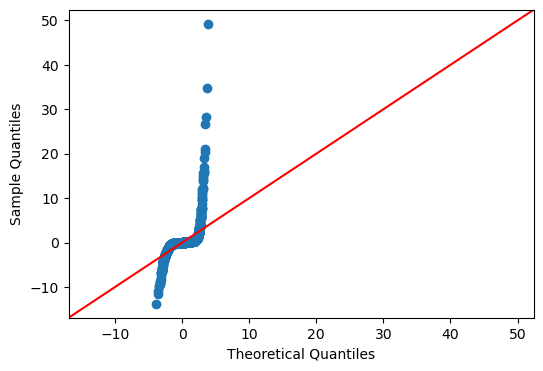

In [44]:
## Create a Q-QPlot

# first calculate residuals 
resid = y_test - y_hat_test

## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True,ax=ax);

## Residual Plot for Checking Homoscedasticity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Revenue')]

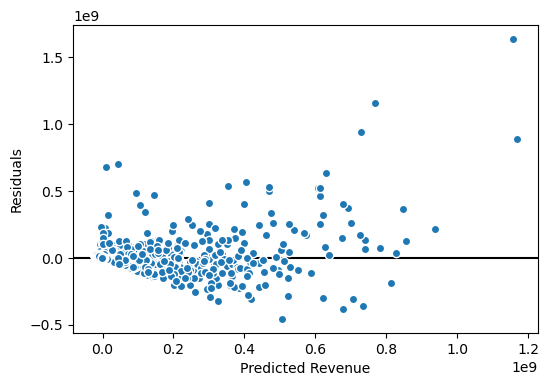

In [45]:
## Plot scatterplot with y_hat_test vs resids
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_hat_test, resid, ec='white')
ax.axhline(0,c='black',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')